<a href="https://colab.research.google.com/github/thiagoteles10/previsao-de-doencas-cardiovasculares-com-ML/blob/main/machine_learning_para_previs%C3%A3o_de_mortes_por_doen%C3%A7as_cardiovasculares_pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.9 MB/s eta 0:00:00


# CARREGA BIBLIOTECAS

# PRIMEIRO MODELO USANDO APENAS UM ALGORITMO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier



# CARREGA DATASET

In [3]:
# CARREGANDO O DATASET

heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
heart_data.nunique().sort_values()

anaemia                       2
diabetes                      2
high_blood_pressure           2
sex                           2
smoking                       2
DEATH_EVENT                   2
ejection_fraction            17
serum_sodium                 27
serum_creatinine             40
age                          47
time                        148
platelets                   176
creatinine_phosphokinase    208
dtype: int64

Vemos acima que temos variáveis do tipo categóricas e variáveis do tipo numéricas. As variáveis que tem como valor 2, são variáveis do tipo dummy que são classificadas como variáveis categóricas.

In [6]:
# SEPARANDO AS FEATURES E O TARGET
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',]

target = 'DEATH_EVENT'

In [7]:
# SEPARANDO O X E Y
X = heart_data[features]
y = heart_data[target]

In [8]:
# DIVIDINDO OS DADOS EM TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [9]:
# DIVIDINDO AS VARIÁVEIS EM CATEGÓRICAS E NUMÉRICAS
categorical_features = ['diabetes','anaemia','high_blood_pressure','sex','smoking']
numerical_features = [
    'age',  
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'time']

In [10]:
# CRIANDO O MODELO DE PIPELINE

categorical_pipe = Pipeline([
    ('encoder', OneHotEncoder()),
    
])

numerical_pipe = Pipeline([
    ('scaler', StandardScaler()),
    
])

transformer = ColumnTransformer(transformers=[
      ('categorical_transformer', categorical_pipe, categorical_features),
      ('numerical_transformers', numerical_pipe, numerical_features),     
])

      
X_train_transformed = transformer.fit_transform(X_train,y_train)
X_test_transformed = transformer.transform(X_test)

In [11]:
# CRIANDO O MODELO DE REGRESSÃO COM O RANDOM FOREST
rf = RandomForestClassifier()

In [12]:
# TREINANDO O MODELO
rf.fit(X_train_transformed,y_train);

In [13]:
# REALIZANDO A PREDIÇÃO
y_pred = rf.predict(X_test_transformed)

In [14]:
# modelo previsto pela arvóre de decisão
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
# AQUI ESTAMOS PEGANDO A PROBABILIDADE DE UM EVENTO ACONTECER. 
rf.predict_proba(X_train_transformed)

In [16]:
# valores reais para os resultados
y_test.values

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

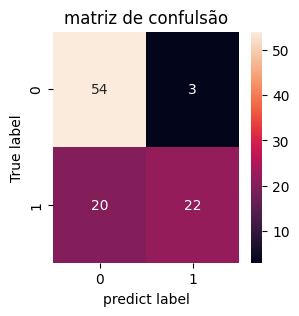

In [17]:
# plotando uma matrix de confulsão para comparar a previsão feita pelo módelo com a saída real.
plt.figure(figsize=(3,3));
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True);
plt.title('matriz de confulsão');
plt.xlabel('predict label');
plt.ylabel('True label');

Através da matriz de confulsão nosso modelo previu corretamente que 54 pessoas não morreriam e 22 morreriam. porém, nosso modelo errou ao afirmar que 3 pessoas morreriam quando na verdade não morreram e o modelo previu que 20 pessoas não morreriam quando na verdade essas pessoas morreram. Como nosso principal objetivo é tentar prever ao máximo o número de mortes, faremos uma modificação no valor do threshold sabendo que essa modificação irá alterar os valores das outras métricas como: accuracy_score, roc_auc_score, f1_score, precision_score. O principal objetivo aqui é tentar prever o máximo do número de mortes.

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

print(f'acurácia: {accuracy_score(y_test,y_pred):.2f}')
print(f'Recall; {recall_score(y_test,y_pred):.2f}')
print(f'Precision: {precision_score(y_test,y_pred):.2f}')
print(f'F1-Score: {f1_score(y_test,y_pred):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test,y_pred):.2f}')

acurácia: 0.77
Recall; 0.52
Precision: 0.88
F1-Score: 0.66
ROC/AUC: 0.74


Vemos acima que temos uma boa acurácia, porém o recall, que é o VP/VP+FN que o nosso modelo previu foi péssimo, não conseguindo prever 20 mortes que aconteceram.

### AGORA IREMOS FAZER UMA MUDANÇA NO THRESHOLD PARA AUMENTAR O VALOR DO RECALL. QUANTO MAIOR O RECALL, MAIOR É O NÚMERO DE MORTES QUE O MODELO PODE PREVER COM EXATIDÃO.

In [19]:
''' aqui estamos mudando o threshold para aumentarmos a capacidade do nosso modelo prever as mortes.
Aqui estamos dizendo ao predict_proba que se a probabilidade de o paciente morrer for maior ou igual a 10%,
que devemos classificar esse paciente como uma provável morte pelo algoritmo.
Percebemos que conforme mudamos o threshold alguma métricas pioram, mas como nosso foco é no recall que 
é Nº de pessoas que morreram e nosso modelo acertou, temos um recall de 84% o que é bastante aceitável.
'''
y_pred_novo = (rf.predict_proba(X_test_transformed)[:, 1] >= 0.10).astype('bool')
y_pred_novo

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True])

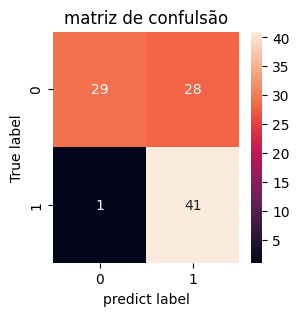

In [20]:
# plotando uma matrix de confulsão para comparar a previsão feita pelo módelo com a saída real.
plt.figure(figsize=(3,3));
sns.heatmap(confusion_matrix(y_test,y_pred_novo), annot=True);
plt.title('matriz de confulsão');
plt.xlabel('predict label');
plt.ylabel('True label');

In [21]:
print(f'acurácia: {accuracy_score(y_test,y_pred_novo):.2f}')
print(f'Recall; {recall_score(y_test,y_pred_novo):.2f}')
print(f'Precision: {precision_score(y_test,y_pred_novo):.2f}')
print(f'F1-Score: {f1_score(y_test,y_pred_novo):.2f}')
print(f'ROC/AUC: {roc_auc_score(y_test,y_pred_novo):.2f}')

acurácia: 0.71
Recall; 0.98
Precision: 0.59
F1-Score: 0.74
ROC/AUC: 0.74


Vemos que com a alteração do valor do threshold, o modelo foi capaz de prever corretamente 41 das 42 mortes que ocorreram, fazendo com que o recall aumentasse de 0.52 para 0.98 o que tornou o modelo execelente para prever as mortes que aconteceram. Em contrapartida, o modelo errou mais prevendo que 28 pessoas iriam morrer quando na realidade o resultado real mostrou que essas pessoas não morreriam. Como o principal objetivo era aumentar a previsibilidade do número de mortes que realmente aconteceram, vemos que a alteração do threshold alcançou o objetivo, mesmo que o modelo tenha previsto que 28 pessoas iriam morrer quando na realidade não morreriam. É muito mais custoso para o modelo errar a previsão do número de mortes que realmente aconteceram do que o número de mortes que não aconteceu e ele previu que aconteceria.

## SEGUNDO MODELO, USANDO VÁRIOS ALGORITMOS.

In [22]:
# Preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [23]:
heart_data_novo_teste = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [24]:
X = heart_data_novo_teste.drop('DEATH_EVENT', axis=1)
y = heart_data_novo_teste['DEATH_EVENT']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [26]:
heart_data_novo_teste.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [27]:
numericas  = [
    'age',  
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'time']

categoricas = ['diabetes','anaemia','high_blood_pressure','sex','smoking']

In [28]:
# Tratamento de variaveis categoricas com one-hot encoding
# e standard scaler nas variaveis continuas
preprocessor = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), categoricas), 
('Scaler', StandardScaler(), numericas)])

In [29]:
classifiers = [
                KNeighborsClassifier(3),
                SVC(),
                LogisticRegression(),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
]

for classifier in classifiers:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print(f'Recall: {recall_score(y_test,y_pred):.2f}')
    print("################################################")

  

KNeighborsClassifier(n_neighbors=3)
model score: 0.747
Recall: 0.42
################################################
SVC()
model score: 0.720
Recall: 0.48
################################################
LogisticRegression()
model score: 0.773
Recall: 0.55
################################################
DecisionTreeClassifier()
model score: 0.653
Recall: 0.48
################################################
RandomForestClassifier()
model score: 0.760
Recall: 0.58
################################################
AdaBoostClassifier()
model score: 0.707
Recall: 0.52
################################################
GradientBoostingClassifier()
model score: 0.707
Recall: 0.55
################################################
